# 1. Libraries and Packages

In [1]:
# import general packages - numpy,pandas,seaborn,matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# 2. Import Cleaned Dataset

In [2]:
#Import the data set
traindata = pd.read_csv('cleaned_data.csv')
traindata.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1


# 3. Model 1: Decision Tree Classifier

## Background Information about Decision Tree Classifier:

A Decision Tree Classifier is a type of supervised machine learning algorithm used for classification tasks. It works by creating a tree-like model of decisions and their possible consequences. 

The algorithm builds the decision tree by recursively splitting the data based on the features that are most informative for the classification task. At each split, the algorithm chooses the feature that maximizes the separation between the classes, based on some metric such as Gini impurity or information gain. The process continues until the tree reaches a stopping criterion, such as a maximum depth or minimum number of samples required to make a split.

Once the decision tree is built, it can be used to classify new instances by traversing the tree from the root to a leaf node based on the values of the instance's features. The leaf node reached by the traversal gives the predicted class label for the instance.

Decision Tree Classifiers are simple to understand and interpret, and can handle both numerical and categorical data. However, they are prone to overfitting and may not generalize well to new data. Techniques such as pruning, ensemble methods, and cross-validation can be used to address these issues.

### Step 1: Separate predictors and responses 

In [3]:
stroke = pd.DataFrame(traindata["stroke"])
predictors = pd.DataFrame(traindata[["sex", "age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level", "bmi", "smoking_status"]])

### Step 2: Split the dataset into training and testing datasets in 8:2 ratio

In [4]:
# Split the Dataset into Train and Test
stroke_train, stroke_test, predictors_train, predictors_test = train_test_split(stroke, predictors, test_size = 0.2, random_state = 42)

Accuracy: 0.6599755201958384


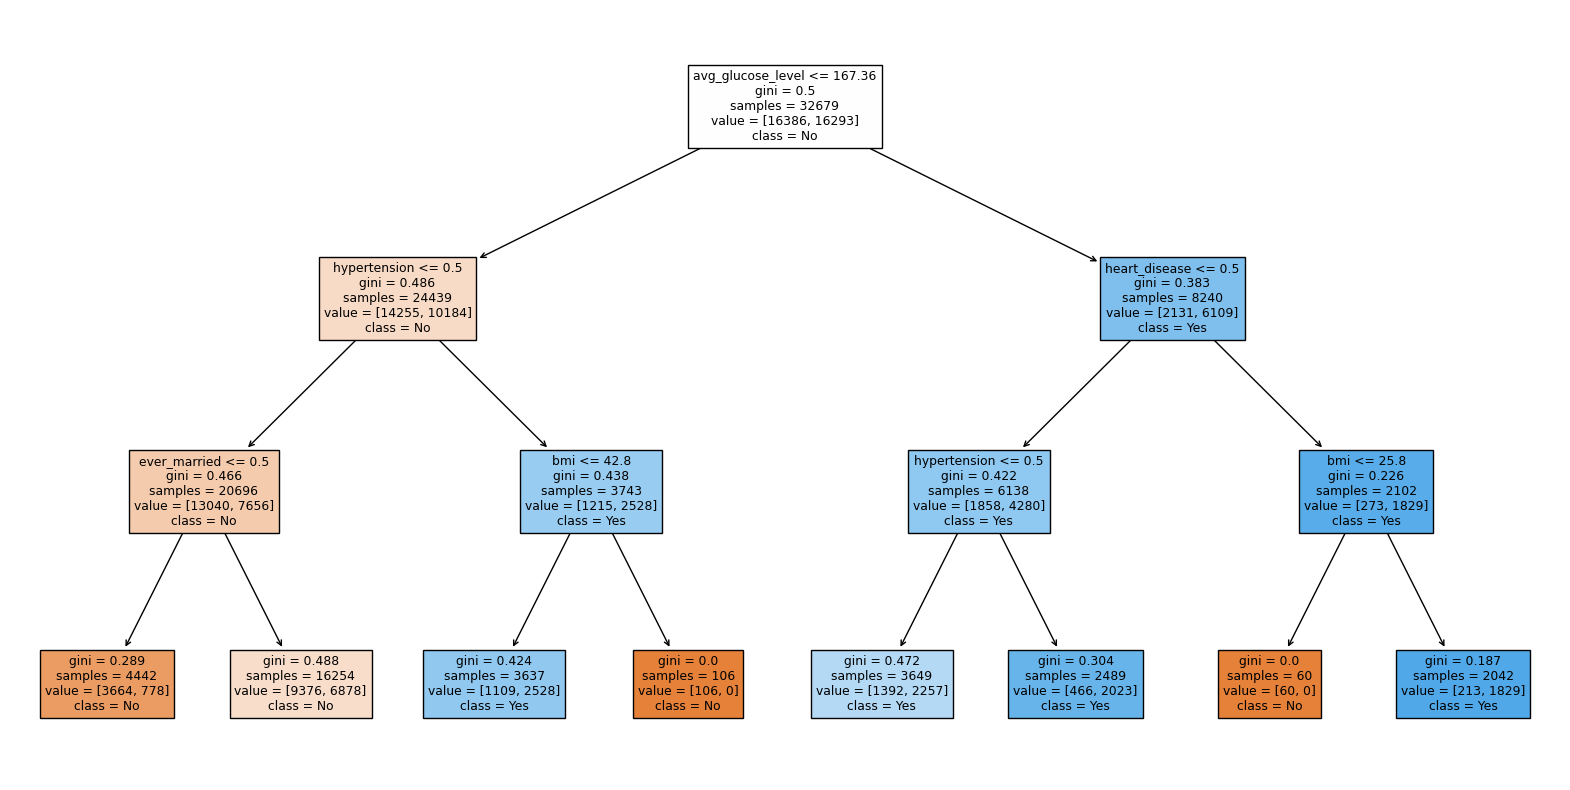

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#Create a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=3)

# Train the classifier on the training data
dt.fit(predictors_train, stroke_train)

# Predict the classes of the test data
stroke_prediction = dt.predict(predictors_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(stroke_test, stroke_prediction)
print('Accuracy:', accuracy)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names= ["sex", "age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level", "bmi", "smoking_status"]  , class_names=['No','Yes'], filled=True)
plt.show()

              precision    recall  f1-score   support

           0    0.62372   0.79636   0.69955      4061
           1    0.72295   0.52519   0.60840      4109

    accuracy                        0.65998      8170
   macro avg    0.67334   0.66077   0.65397      8170
weighted avg    0.67363   0.65998   0.65371      8170



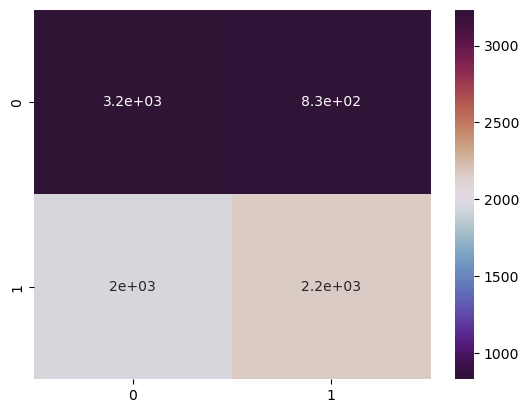

In [6]:
cm = confusion_matrix(stroke_test, stroke_prediction)
sb.heatmap(cm, annot=True, cmap='twilight_shifted')

# Create a classification report
cr = classification_report(stroke_test, stroke_prediction, digits=5)
print(cr)

# 4. Optimisation of Decision Tree Classifier

### Step 1: Find the optimal depth using cross-validation

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


# Define the parameter grid
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(predictors_train, stroke_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
clf.fit(predictors_train, stroke_train)

# Evaluate the model using cross-validation
scores = cross_val_score(clf, predictors_train, stroke_train, cv=5, scoring='accuracy')
mean_score = scores.mean()
std_score = scores.std()

# Print the results
print("Best hyperparameters: ", best_params)
print("Training accuracy: ", clf.score(predictors_train, stroke_train))
print("Model accuracy: ", clf.score(predictors_test, stroke_test))
print("Cross-validation accuracy: %0.3f (+/- %0.3f)" % (mean_score, std_score))


Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2}
Training accuracy:  0.8441812784968941
Model accuracy:  0.8460220318237454
Cross-validation accuracy: 0.840 (+/- 0.003)


### Step 2: Re-running Decision Tree Classifier with a new depth 

Accuracy: 0.8462668298653611


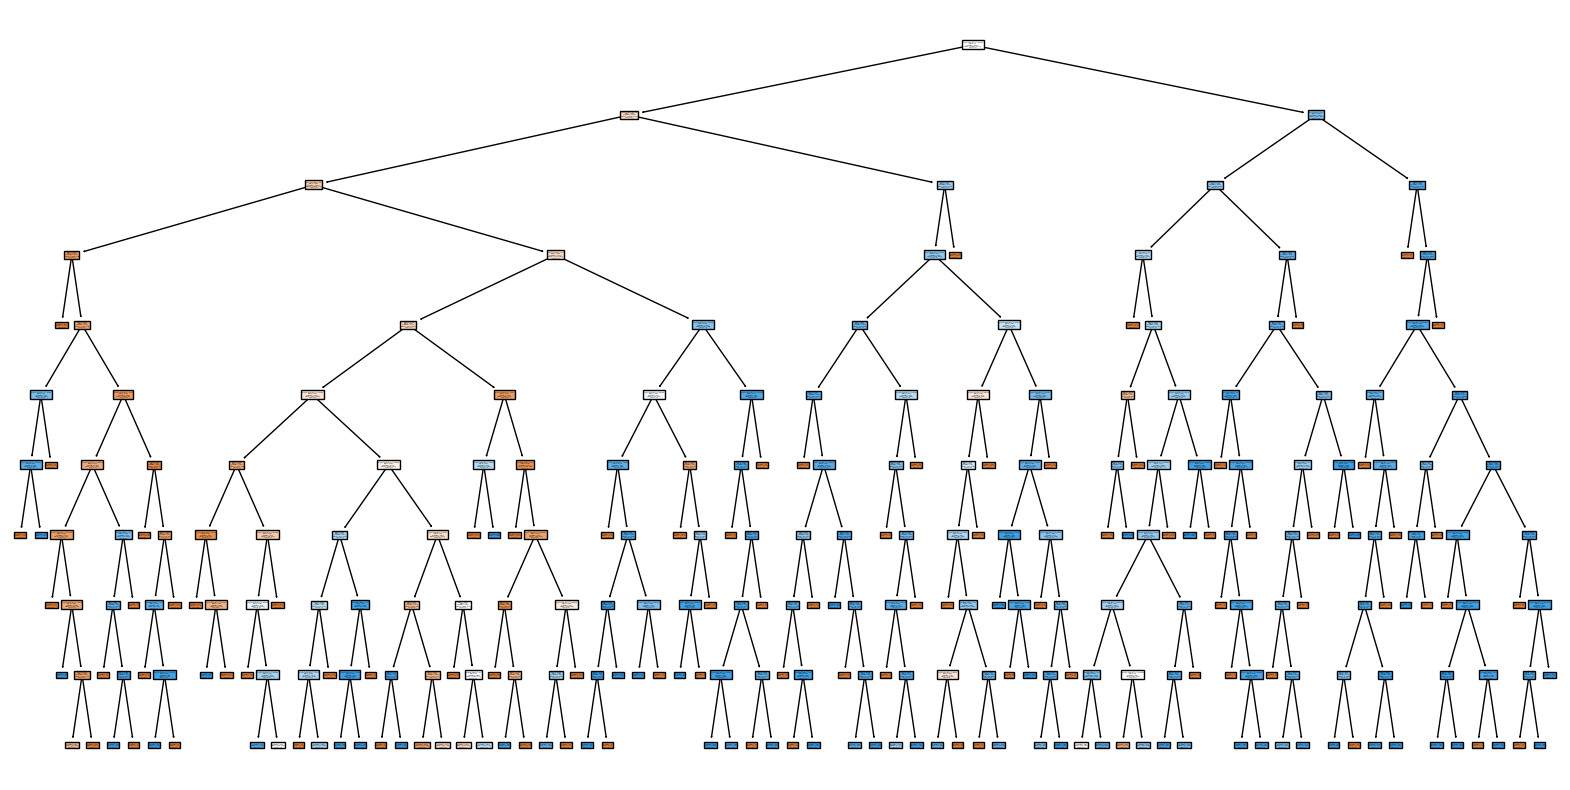

In [8]:
#Create a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=10)

# Train the classifier on the training data
dt.fit(predictors_train, stroke_train)

# Predict the classes of the test data
stroke_prediction = dt.predict(predictors_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(stroke_test, stroke_prediction)
print('Accuracy:', accuracy)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names= ["sex", "age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level", "bmi", "smoking_status"]  , class_names=['No','Yes'], filled=True)
plt.show()

              precision    recall  f1-score   support

           0    0.85624   0.83009   0.84296      4061
           1    0.83700   0.86225   0.84944      4109

    accuracy                        0.84627      8170
   macro avg    0.84662   0.84617   0.84620      8170
weighted avg    0.84656   0.84627   0.84622      8170



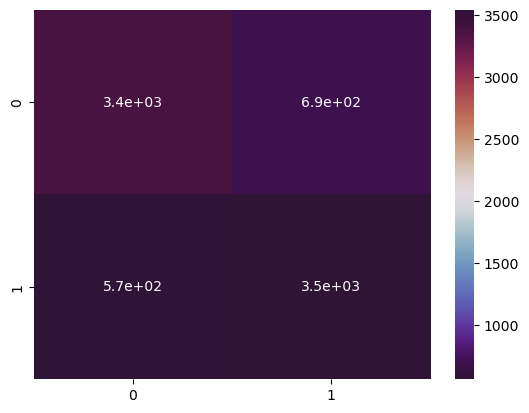

In [9]:
cm = confusion_matrix(stroke_test, stroke_prediction)
sb.heatmap(cm, annot=True, cmap='twilight_shifted')

# Create a classification report
cr = classification_report(stroke_test, stroke_prediction, digits=5)
print(cr)

# 5. Conclusion on Decision Tree Classifier

Decision Tree Classifier is a simple and effective algorithm that can handle both categorical and numerical data. Although decision tree classifier is a useful algorithm used for classification problems, it can be prone to overfitting and therefore, requires optimization for better performance. 

Although we are able to optimise the model to a higher accuracy, in reality, this might not be feasible in terms of the cost require to do it. To achieve the improvement in accuracy, the amount of computing power required might not justify the gains. Moreover, overly increasing the maximum depth of the model might lead to overfitting, leading to inaccuracte predictions on the test data since it takes in too much noise from the training dataset. 